In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)')))

bottle.csv
References
Untitled0.ipynb
Week_1_Python_1.ipynb
heart.csv
pima-indians-diabetes.csv
sonar.csv
housing.csv
winequality-white.csv
auto.csv
sales.csv
birth.csv
shampoo.csv
daily-min-temperatures.csv
Quiz
customer.csv
iris.csv
iris (1).csv
Bootcamp Images
parkinsons
numbers_dataset
bottle-updated.csv
auto-mpg.csv
auto (1).csv


In [8]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/bottle-updated.csv')
df.head()

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.50,33.440
1,1,8,10.46,33.440
2,2,10,10.46,33.437
3,3,19,10.45,33.420
4,4,20,10.45,33.421


In [9]:
df.shape

(864863, 4)

In [10]:
df.dtypes

Unnamed: 0      int64
Depthm          int64
T_degC        float64
Salnty        float64
dtype: object

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,864863.0,432431.000000,249664.587267,0.000,216215.500,432431.000,648646.5000,864862.000
Depthm,864863.0,226.831951,316.050259,0.000,46.000,125.000,300.0000,5351.000
T_degC,853900.0,10.799677,4.243825,1.440,7.680,10.060,13.8800,31.140
Salnty,817509.0,33.840350,0.461843,28.431,33.488,33.863,34.1969,37.034


In [12]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [13]:
df.head()

,Depthm,T_degC,Salnty
0,0,10.50,33.440
1,8,10.46,33.440
2,10,10.46,33.437
3,19,10.45,33.420
4,20,10.45,33.421


In [14]:
print(df.dtypes)
df.shape

Depthm      int64
T_degC    float64
Salnty    float64
dtype: object


(864863, 3)

In [15]:
nulls = df.isnull().sum().sort_values(ascending=False)
percent = round(nulls/len(df)*100, 2)

df_null = pd.DataFrame(columns=['Features', 'Total', 'Percent'])
df_null['Features'] = nulls.index
df_null['Total'] = nulls.values
df_null['Percent'] = percent.values

df_null

,Features,Total,Percent
0,Salnty,47354,5.48
1,T_degC,10963,1.27
2,Depthm,0,0.00


In [16]:
df.dropna(subset=['Salnty'], inplace=True)

In [17]:
#Isi missing values
for i in df.columns:
  if df[i].isnull().sum() > 0:
    df[i].fillna(df[i].mode().mean(), inplace=True)
    print('Filled', i)

Filled T_degC


In [18]:
#Cek ulang missing valuesnya
nulls = df.isnull().sum().sort_values(ascending=False)
percent = round(nulls/len(df)*100, 2)

df_null = pd.DataFrame(columns=['Features', 'Total', 'Percent'])
df_null['Features'] = nulls.index
df_null['Total'] = nulls.values
df_null['Percent'] = percent.values

df_null

,Features,Total,Percent
0,Salnty,0,0.0
1,T_degC,0,0.0
2,Depthm,0,0.0


In [19]:
df.dtypes

Depthm      int64
T_degC    float64
Salnty    float64
dtype: object

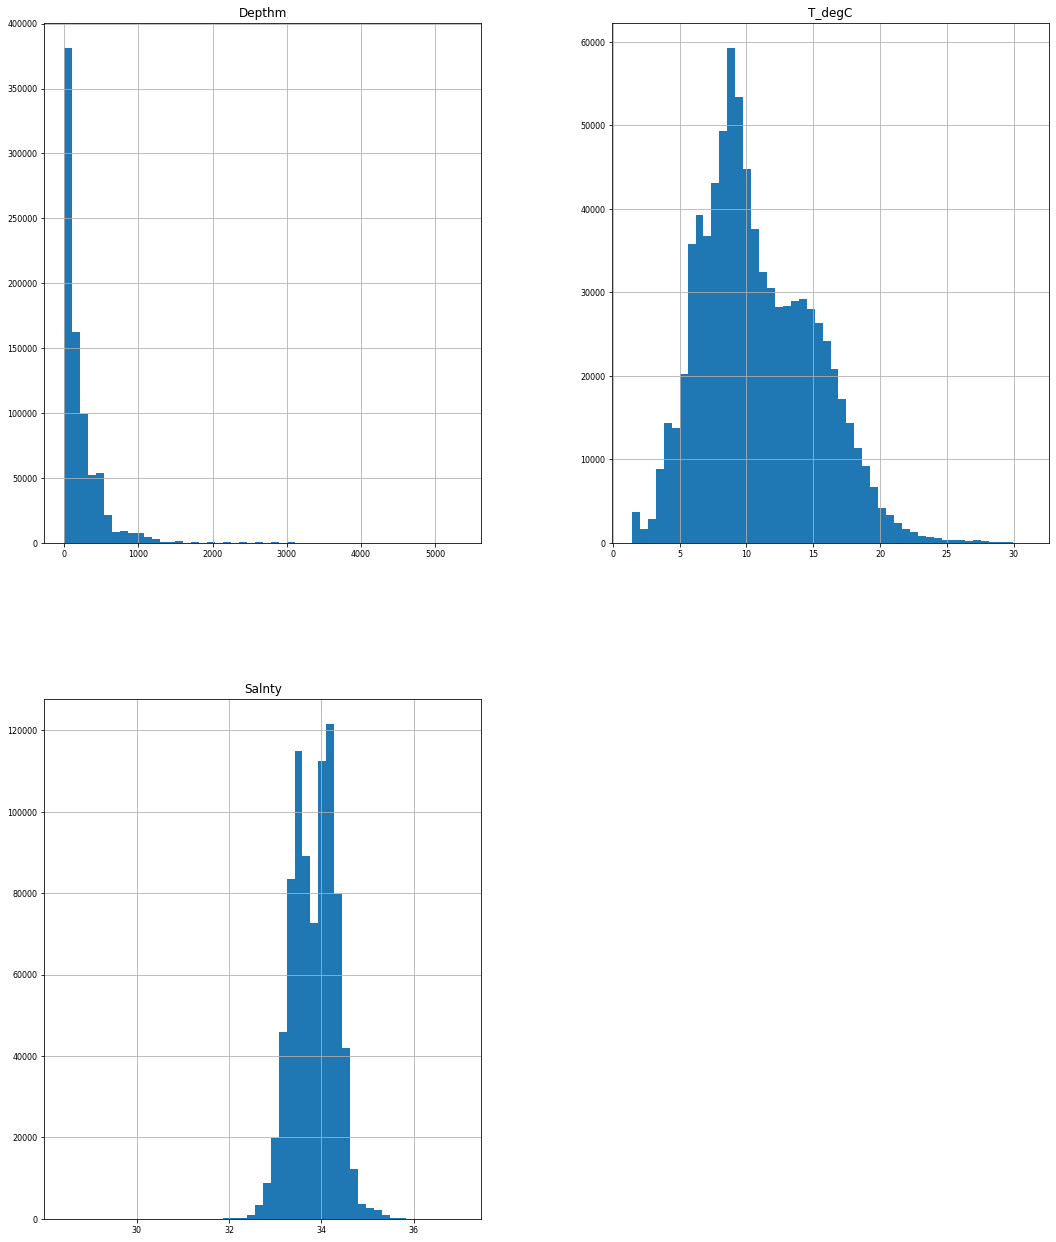

In [20]:
df_numbers = df.select_dtypes(include=['float64', 'int64'])

df_numbers.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

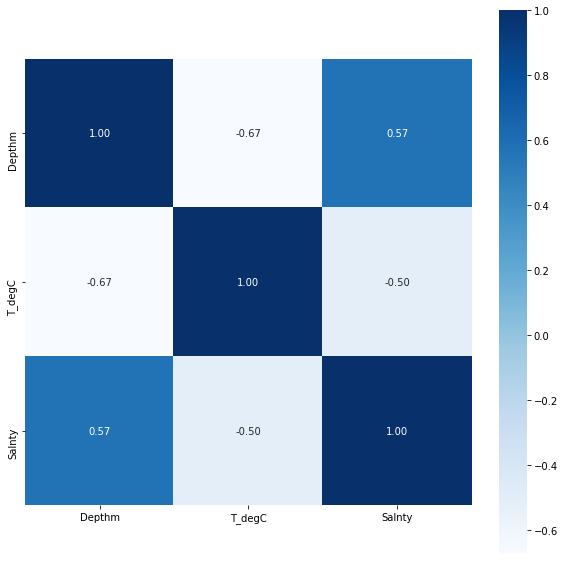

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, cbar=True, square=True, fmt='.2f', cmap='Blues')
plt.show()

## **Machine Learning Model**

### **Linear Regression**

**Feature Engineering**

In [22]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
X = df.drop(['Salnty'], axis=1)
y = df['Salnty']

In [24]:
stdr = StandardScaler()

X = stdr.fit_transform(X.values)
y = stdr.fit_transform(df['Salnty'].values.reshape(-1, 1)).flatten()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((613131, 2), (204378, 2), (613131,), (204378,))

In [27]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

predict_lm = linreg.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, predict_lm)
mae = mean_absolute_error(y_test, predict_lm)
r2 = r2_score(y_test, predict_lm)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_lm)))

MSE (Mean Squared Error)       : 0.6439330576212252
MAE (Mean Absolute Error)      : 0.5601840267313215
r^2 score                      : 0.3538636192903619
RMSE (Root Mean Squared Error  : 0.8024543959760113


## **Deep Learning Model**

In [29]:
def plot_loss_new(history):
  history_df = pd.DataFrame(history.history)

  min_loss_index = history_df[history_df['loss']==min(history_df['loss'])].index.values
  min_loss = history_df.loc[min_loss_index]['loss']
  min_val_loss_index = history_df[history_df['val_loss']==min(history_df['val_loss'])].index.values
  min_val_loss = history_df.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  print('Minimum Loss             :', min_loss)
  print()
  print('Minimum Validation Loss  :', min_val_loss)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
model = Sequential()
model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [32]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
76642/76642 [==============================] - 66s 865us/step - loss: 0.3497 - val_loss: 0.3364
Epoch 2/50
76642/76642 [==============================] - 75s 983us/step - loss: 0.3380 - val_loss: 0.3299
Epoch 3/50
76642/76642 [==============================] - 74s 969us/step - loss: 0.3378 - val_loss: 0.3292
Epoch 4/50
76642/76642 [==============================] - 59s 764us/step - loss: 0.3377 - val_loss: 0.3296
Epoch 5/50
76642/76642 [==============================] - 58s 763us/step - loss: 0.3376 - val_loss: 0.3320
Epoch 6/50
76642/76642 [==============================] - 65s 846us/step - loss: 0.3375 - val_loss: 0.3295
Epoch 7/50
76642/76642 [==============================] - 64s 833us/step - loss: 0.3374 - val_loss: 0.3294
Epoch 8/50
76642/76642 [==============================] - 72s 942us/step - loss: 0.3366 - val_loss: 0.3347
Epoch 9/50
76642/76642 [==============================] - 78s 1ms/step - loss: 0.3365 - val_loss: 0.3393
Epoch 10/50
76642/76642 [==============

In [33]:
predict_dl = model.predict(X_test)
predict_dl = predict_dl.flatten()

In [34]:
mse = mean_squared_error(y_test, predict_dl)
mae = mean_absolute_error(y_test, predict_dl)
r2 = r2_score(y_test, predict_dl)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error) :', np.sqrt(mean_squared_error(y_test, predict_dl)))

MSE (Mean Squared Error)       : 0.29669465361405556
MAE (Mean Absolute Error)      : 0.34845811210536803
r^2 score                      : 0.702290156727983
RMSE (Root Mean Squared Error) : 0.5446968456068527


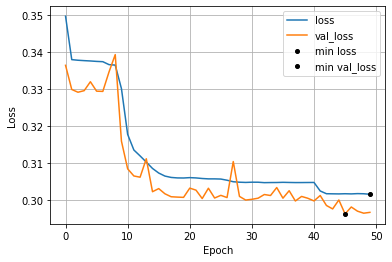

Minimum Loss             : 49    0.301582
Name: loss, dtype: float64

Minimum Validation Loss  : 45    0.296272
Name: val_loss, dtype: float64


In [35]:
plot_loss_new(history)

Sweet spot berada pada epoch 45 dengan val_loss 0.296272

## **Deep Learning Wider Model with RMSprop Optimizer**

In [36]:
from tensorflow.keras.optimizers import RMSprop

In [37]:
wider2 = Sequential()
wider2.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider2.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(learning_rate=0.001, momentum=0.9)

wider2.compile(loss='mean_squared_error', optimizer=opt)

wider2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [38]:
history4 = wider2.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
76642/76642 [==============================] - 54s 710us/step - loss: 0.3302 - val_loss: 0.3173
Epoch 2/50
76642/76642 [==============================] - 55s 718us/step - loss: 0.3253 - val_loss: 0.3157
Epoch 3/50
76642/76642 [==============================] - 54s 701us/step - loss: 0.3254 - val_loss: 0.3240
Epoch 4/50
76642/76642 [==============================] - 50s 656us/step - loss: 0.3258 - val_loss: 0.3550
Epoch 5/50
76642/76642 [==============================] - 50s 650us/step - loss: 0.3281 - val_loss: 0.3558
Epoch 6/50
76642/76642 [==============================] - 50s 659us/step - loss: 0.3301 - val_loss: 0.3044
Epoch 7/50
76642/76642 [==============================] - 51s 665us/step - loss: 0.3318 - val_loss: 0.3214
Epoch 8/50
76642/76642 [==============================] - 51s 666us/step - loss: 0.3350 - val_loss: 0.3223
Epoch 9/50
76642/76642 [==============================] - 53s 696us/step - loss: 0.3366 - val_loss: 0.3146
Epoch 10/50
76642/76642 [============

In [39]:
predict_rms = wider2.predict(X_test)
predict_rms = predict_rms.flatten()

In [40]:
mse = mean_squared_error(y_test, predict_rms)
mae = mean_absolute_error(y_test, predict_rms)
r2 = r2_score(y_test, predict_rms)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_rms)))

MSE (Mean Squared Error)       : 0.3177505934359147
MAE (Mean Absolute Error)      : 0.3784936291435438
r^2 score                      : 0.6811621705376254
RMSE (Root Mean Squared Error  : 0.5636937053364307


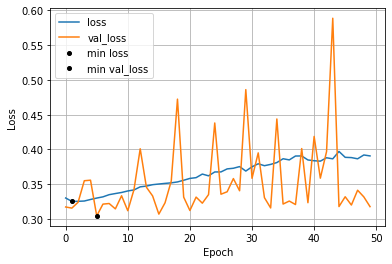

Minimum Loss             : 1    0.325297
Name: loss, dtype: float64

Minimum Validation Loss  : 5    0.304423
Name: val_loss, dtype: float64


In [41]:
plot_loss_new(history4)

Sweet spot berada pada epoch 5 dengan val_loss 0.304423

## **Deep Learning Wider Model with SGD Optimizer**

In [42]:
from tensorflow.keras.optimizers import SGD

In [43]:
wider1 = Sequential()
wider1.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider1.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)

wider1.compile(loss='mean_squared_error', optimizer=opt)

wider1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [44]:
history3 = wider1.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
76642/76642 [==============================] - 54s 710us/step - loss: 0.3414 - val_loss: 0.3106
Epoch 2/50
76642/76642 [==============================] - 67s 878us/step - loss: 0.3173 - val_loss: 0.3353
Epoch 3/50
76642/76642 [==============================] - 54s 698us/step - loss: 0.3156 - val_loss: 0.3130
Epoch 4/50
76642/76642 [==============================] - 57s 747us/step - loss: 0.3154 - val_loss: 0.3078
Epoch 5/50
76642/76642 [==============================] - 57s 743us/step - loss: 0.3154 - val_loss: 0.3055
Epoch 6/50
76642/76642 [==============================] - 60s 789us/step - loss: 0.3148 - val_loss: 0.3128
Epoch 7/50
76642/76642 [==============================] - 57s 749us/step - loss: 0.3150 - val_loss: 0.3228
Epoch 8/50
76642/76642 [==============================] - 61s 792us/step - loss: 0.3148 - val_loss: 0.3246
Epoch 9/50
76642/76642 [==============================] - 68s 889us/step - loss: 0.3145 - val_loss: 0.3081
Epoch 10/50
76642/76642 [============

In [45]:
predict_sgd = wider1.predict(X_test)
predict_sgd = predict_sgd.flatten()

In [46]:
mse = mean_squared_error(y_test, predict_sgd)
mae = mean_absolute_error(y_test, predict_sgd)
r2 = r2_score(y_test, predict_sgd)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_sgd)))

MSE (Mean Squared Error)       : 0.30439101963260734
MAE (Mean Absolute Error)      : 0.3570734521311529
r^2 score                      : 0.6945674563245992
RMSE (Root Mean Squared Error  : 0.5517164304537316


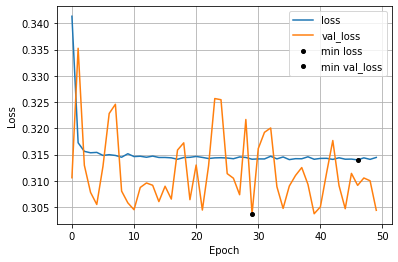

Minimum Loss             : 46    0.313996
Name: loss, dtype: float64

Minimum Validation Loss  : 29    0.303704
Name: val_loss, dtype: float64


In [47]:
plot_loss_new(history3)

Sweet spot berada di epoch 29 dengan val_loss 0.303704

## **Kesimpulan**

Notebook terbagi dalam 2 folder yaitu folder Bottle_Deep_Learning_(Linear_Regression, Baseline_Layer, Wider SGD, Wider RMSprop) batch_size 8, dropna Saltny.ipynb dan Bottle_Deep_Learning_(Deeper,_Wider) batch_size 8, dropna Saltny.ipynb

1. R2 score model Linear Regression            : 0.3538636192903619
2. R2 score Deep Learning Model Baseline Layer : 0.702290156727983
3. R2 score Deep Learning Model Deeper Layer   : 0.7043312743992796
4. R2 score Deep Learning Model Wider Layer   : 0.7031906598053114
5. R2 score Deep Learning Model Wider Layer SGD Optimizer   : 0.6945674563245992
6. R2 score Deep Learning Model Wider Layer RMSprop Optimizer : 0.6811621705376254

Model terbaik adalah model Deep Learning dengan Deeper Layer dan Optimizer Adam dengan nilai r2 score berada diangka 0.704, mungkin dengan penambahan feature bisa meningkatkan nilai r2 scorenya menjadi lebih baik lagi. Penambahan batch size juga bisa membuat kecepatan prosesnya menjadi lebih cepat walaupun belum tentu juga menghasilkan nilai r2 score yang lebih baik